# Lesson 11
Exam preperation

Agenda:
  * Solving sample questions
  * Questions from exams
  * Makefile
  

## Exam structure
* 2 hours
* 1 paper formula sheet (2-sided)
* 4 questions:
  - 2 x open questions in C
  - 2 x open questions Python
* Python Material:
  - Everything we learned in lectures
  - Data science oriented Python questions


# Python questions

### Example 1
Given a table called production, which includes the yearly production amount for 5 employees (ascending order). We want to calculate the expected production for new employees using a table called NEW_EMPS that has columns:ID, years_exp. The expected production is calculated by: exp_prod = years_exp * alpha, where alpha is the average production of employees 3 and 4 in their first 5 years.
Complete the below code to solve the question.



In [ ]:
>>> production.shape #numpy table
(20,5)
# --------- Write your code here ------------------
>>> print(new_emps['exp_prod'])
42105
265455
333008

Understanding the question:

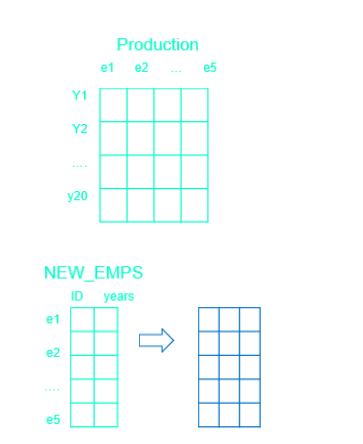

The goal: adding a column </br>
exp_prod = years_exp * alpha

alpha = average production of employees 3 and 4 in their first 5 years

### Solution

In [ ]:
>>> production.shape #numpy table
(20,5)
# ---------------------------
>>> alpha = production[:5, [2, 3]].mean()
>>> new_emps['exp_prod'] = new_emps['years_exp’]* alpha
# ---------------------------
>>> print(new_emps['exp_prod'])
42105
265455
333008
...

### Question:
What if production table was pandas DataFrame?



Calculation of alpha would change:



In [ ]:
>>> alpha = production.iloc[:5, [2, 3]].mean()

## Example 2

For each continent show the continent and number of countries with population of at least 10 million.
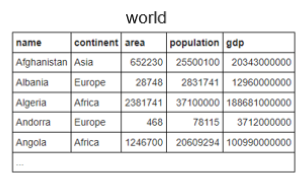

### Solution

In [ ]:
import numpy as np
import pandas as pd

big_countries = world[world['population']>=10000000]
# Complete the code here
big_per_cont = big_countries.groupby(['continent']).name.count()
# --------------------
print(big_per_cont)


## Example 3

Given a trained classification model by logistic regression, called cls, predict the classification for the point (-0.794, 2.104)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Complete the code here
# --------------------


### Solution

In [ ]:
from sklearn.linear_model import LogisticRegression
# Complete the code here
Xnew = [[-0.794, 2.104]]

cls.predict(Xnew)
# --------------------


## Preprocessor

The preprcessor process the source code *before* compilation

### Exercise:
For each of the following macros, give a problematic examle.

1. ```c
# define MUL(x, y) x * y
```



Problem example:
```c
MUL(1 + 2, 2) => 1+2 * 2
```

Fix attempt:
```c
# define MUL(x, y) (x) * (y)
```


Problem example:
```c
6 / MUL(2, 3) => 6 / (2) * (3)
```

Solution:
```c
# define MUL(x, y) ((x) * (y))
```

2. ```c
# define ADD(x, y) ((x)+(y));
```

Problem example:
```c
if (ADD(1, 3) == 4)
  printf("Do you see the problem?\n");
```

3. ```c
#define PRINT_VAR(var) printf("The value of %s is %d\n", var, var)
```

Doesn't even compile!

Example code:
```c
int x = 5;
PRINT_VAR(x); => printf("The value of %s is %d\n", x, x)
```

Solution:
```c
# define PRINT_VAR(var) printf("The value of %s is %d\n", #var, var)
```


Example code:
```c
int x = 5;
PRINT_VAR(x); => printf("The value of %s is %d\n", "x", x)
```

To play with it more: gcc -E

# Exam Questions

## 2021 AA (Q1b)



Given the below linked list:


```c
typedef struct list_t {
      int val;
      struct list_t* next;
} LIST;
```
Write a function "concat" that receives 2 pointers to linked lists, and concatenates the second LL to the end of the first one, no need to return anything.


### Solution


```c
void concat(LIST* a, LIST* b)
{
	while (a->next != NULL)
	{
		a = a->next;
	}

	a->next = b;
}
```



Think:
Are there any edge cases?

## 2021 AA (Q1c)

Write a function called create, that gets a natural number n and returns a pointer called a, the pointer should point to a data structure that stores n*n integers, and it's elements are accessible using this syntaxt a[i][j] (i,j are between 1-n) and all values are initialized to 0.


### Solution attempt

```c
int** create(int n)
{
	int i, j;
	int **vals = (int**)malloc(n * sizeof(int*));
	assert(vals);
	for (i = 0; i < n; i++)
	{
		int* m = (int*)malloc(n * sizeof(int));
		assert(m);
		for (j = 0; j < n; j++)
		{
			m[j] = 0;
		}
	}


	return vals;
}

```



### Solution

```c
int** create(int n)
{
	int i, j;
	int **vals = (int**)malloc(n * sizeof(int*));
	assert(vals);
	for (i = 0; i < n; i++)
	{
		int* m = (int*)malloc(n * sizeof(int));
		assert(m);
		for (j = 0; j < n; j++)
		{
			m[j] = 0;
		}
		vals[i] = m-1 ;
	}


	return vals-1;
}

```



## 2023 AA


Write a preprocessor macro that receives two arguments (representing two different
integer variables) and swaps their values. The macro can use only bitwise and
assignment operators. No other operators are allowed.

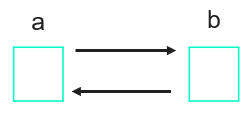

### The idea:

<p>a <- a^b</p>
<p>b <- a^b</p>
<p>a <- a^b</p>

### Solution
```c
# define switch(a, b) ((a) ^= (b) ^= (a) ^= (b))
```

Code example:

```c
int main() {
  int num1=2, num2 = 3;
  switch(num1, num2)
  return 0;
}
```

# 2023 AB

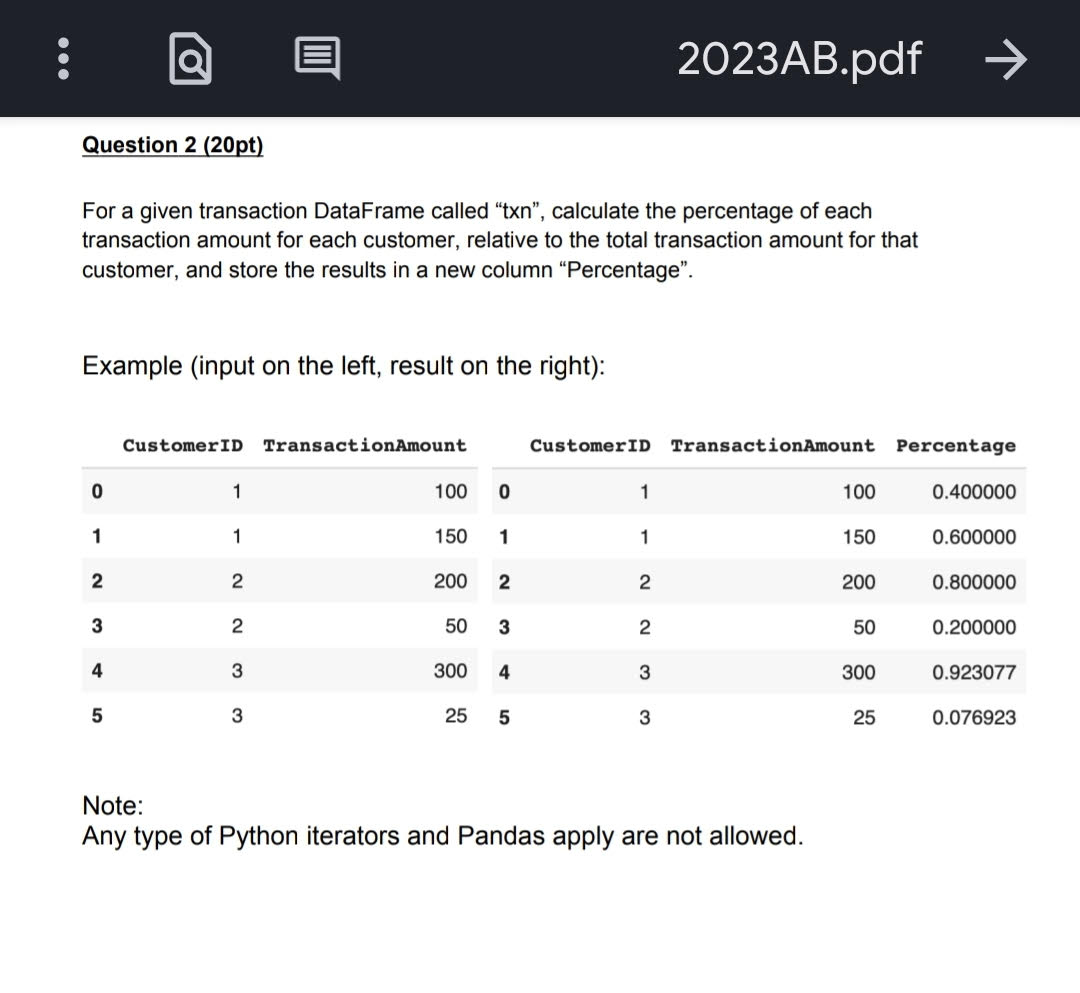

In [5]:
import pandas as pd
txn = pd.DataFrame({"customerId": [1, 1, 2, 2, 3], "TransactionAmount": [100, 150, 200, 50, 300]})


### Solution

In [6]:
per_customer = txn.groupby(by=["customerId"]).TransactionAmount.sum()
txn["percentage"] = txn["TransactionAmount"] / per_customer[txn["customerId"]].values
txn

,customerId,TransactionAmount,percentage
0,1,100,0.4
1,1,150,0.6
2,2,200,0.8
3,2,50,0.2
4,3,300,1.0


# 2024 AA

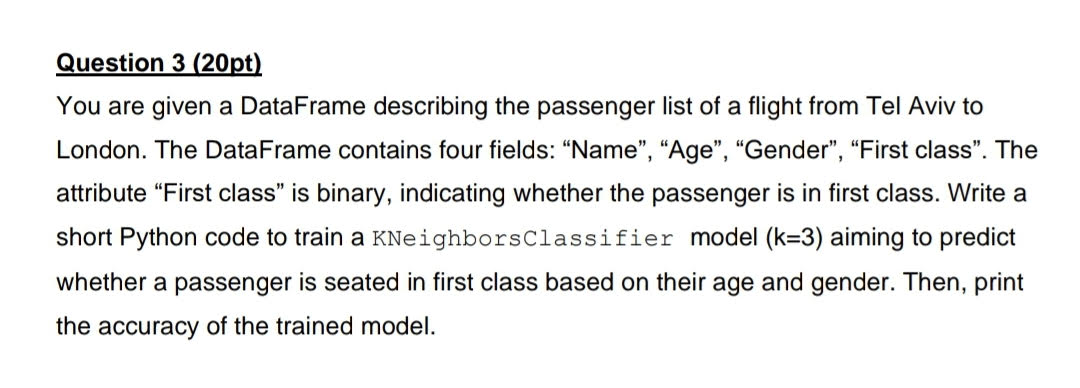

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create x, y
x = df.loc[:, ["Age", "Gender"]].to_numpy()
y = df.loc[:, "First class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Calculates accuracy
print((pred == y_test).mean())

# For accuracy there is also: sklearn.metrics.accuracy_score

# 2023 AA

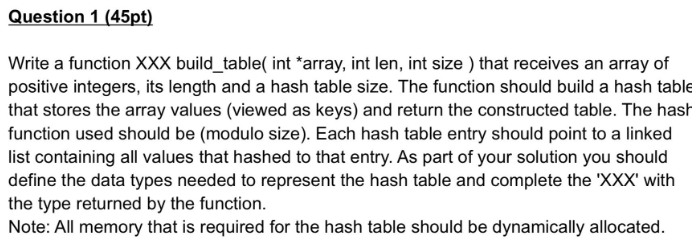

Hash table:</br>
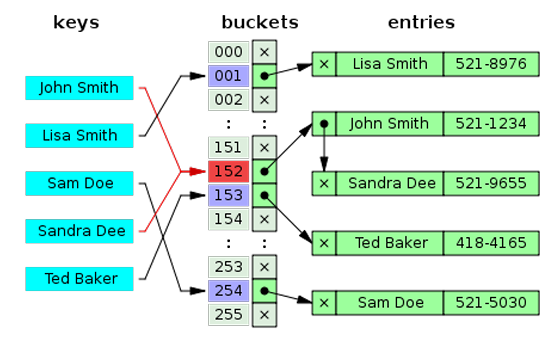

### Solution idea:
Array of linked lists

### Solution:

Defining the struct - regular struct of linked lists
```c
typedef struct Node {
	int val;
	struct Node* next;
} Node;
```

```c
Node** build_table(int* array, int len, int size) {
	int i, key;
	Node* cur, *place;
	Node** table = (Node**) malloc(size * sizeof(Node*));
	assert(table);

	/* Initialize hash table */
	for (i=0; i<size; i++) {
		table[i] = (Node*) malloc(sizeof(Node));
		assert(table[i]);
		/* Dummy node (for convenience)*/
		table[i]->val = 0;
		table[i]->next = NULL;
	}

	for (i=0; i<len; i++) {
		key = array[i] % size;
		/* Create the new node */
		cur = (Node*) malloc(sizeof(Node));
		assert(cur);
		cur->val = array[i];
		cur->next = NULL;

		/* Add the new node to the list */
		place = table[key];
		while (place->next != NULL) {
			place = place->next;
		}
		place->next = cur;
	}

	/* We dont free at the end since we return the table*/
	return table;
}
```

Question for thought: what would happen if we allocated the memory for the table statically?

# 2024 AB

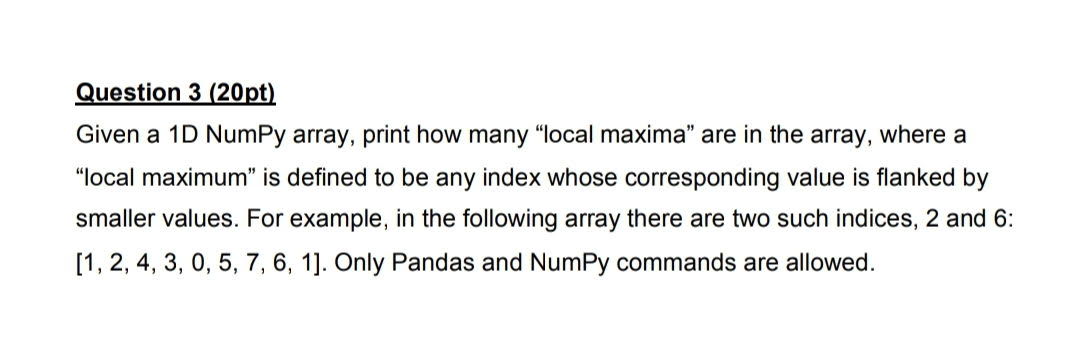

The idea: shift the array to compare each element to the next\ previous one

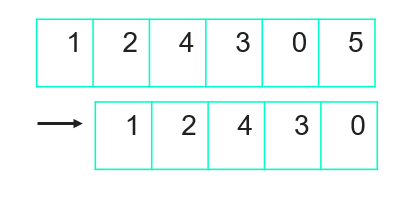

Implementation: can be done using slicing, np.roll, pd.shift etc

## 2021 AA (Q1a)
Write a program that gets a number of command line's arguments from the user, the program has to print the number of arguments (excluding the name of the program) that as a string they are 1 char long.


### Solution



```c
void main(int argc, char* argv[])
{
	int count = 0;
	for (int i = 1; i < argc; ++i)
	{
		char* arg = argv[i];
		if(arg[1] == '\0')
		{
			count++;
		}
	}

	printf("%d\n", count);
}

```

